### *Project Title: New-York City Air Quality Analysis*


### *Business Problem Statement:*
*You have been provided with a detailed dataset on New York City's air quality, which includes pollutant levels (NO₂, PM2.5, Ozone), emission sources (vehicle miles traveled, boiler emissions), population density, geographic locations, seasonal and yearly time frames, and associated health indicators (asthma, cardiovascular issues, respiratory hospitalizations, and death rates).*

*Your objective is to perform a comprehensive data analysis using Python and Excel to uncover trends, correlations, and regional patterns that influence air quality and public health across NYC. The goal is to support government agencies, environmental strategists, and public health professionals with actionable insights.*

*You will create an analytical report and an interactive dashboard that answer the following integrated business questions:*

1.	*`Pollution Levels & Sources`: What are the average, minimum, and maximum concentrations of pollutants across different districts? How do vehicle emissions and boiler usage contribute to air pollution?*
2.	*`Temporal Trends`: How do air quality and health outcomes vary by season and over the years? Are there any improvements or worsening trends?*
3.	*`Geographic Insights`: Which areas (boroughs or districts) are most affected by pollution and health risks? How does population density relate to air quality metrics?*
4.	*`Health Impact Assessment`: What is the relationship between pollution levels and hospitalization/emergency rates for asthma, respiratory, cardiovascular issues, and mortality?*
5.	*`Demographic Patterns`: How do different age groups (All Ages, Under 18, 18+, 30+) experience health impacts in relation to air quality?*
6.	*`Outlier Detection & Data Quality`: Are there any extreme values in pollutant or health data? What steps were taken to handle them for accurate modeling?*
7.	*`Measure Standardization`: How were units and measurement standards (e.g., µg/m³, per 100,000 population) harmonized for cross-comparison?*

`Deliverables`
- *A cleaned and transformed dataset with standardized measures and derived insights*
- *Visual reports and summary dashboards built in Excel and Python (Matplotlib/Seaborn/Pandas)*
- *A brief insight document outlining major findings and actionable recommendations*



*Author – Niranjan (Data Analyst)*

### *Environmental Setup*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

pd.set_option('display.max_rows', None)

### *Data Loading*
- *Dataset is in CSV (Comma Seperated Values)*

In [2]:
df = pd.read_csv("Air_Quality.csv")

### *Data Understanding*
- *Rows - 18862*
- *Columns - 12*

In [3]:
# To identify the number of rows and columns in a data set
df.shape

(18862, 12)

In [4]:
# To identify the first five rows and columns in a data set
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12-01-2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12-01-2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01-01-2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12-01-2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06-01-2016,14.00,NaN


In [5]:
# TO identify the name of all the columns
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [6]:
# List of columns to drop that are not required for the Data Analysis
cols_to_drop = [
    'Unique ID', 
    'Indicator ID',
    'Geo Type Name', 
    'Geo Join ID',
    'Message'
]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

In [7]:
# Checking the name of columns left after the Dropping of usless column
df.columns

Index(['Name', 'Measure', 'Measure Info', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value'],
      dtype='object')

In [8]:
df.dtypes

Name               object
Measure            object
Measure Info       object
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
dtype: object

In [9]:
df.isna().sum()

Name              0
Measure           0
Measure Info      0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18862 non-null  object 
 1   Measure         18862 non-null  object 
 2   Measure Info    18862 non-null  object 
 3   Geo Place Name  18862 non-null  object 
 4   Time Period     18862 non-null  object 
 5   Start_Date      18862 non-null  object 
 6   Data Value      18862 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.0+ MB


### *Data Exploration*

### *`Name`*
- Data type is object
- No missing values
- Need for standarization of the column
- Total 18 unique values
- Highest is Nitrogen dioxide (NO2) and the values count is 6345
- Lowest is Boiler Emissions- Total PM2.5 Emissions and the value counts is 96
- `Data Cleaning`
- Convert the data type
- Categorize them or create a new column (Featured Enginerring)
- Trim spaces
- Fix spacing
- Fix tittle case
- Convert empty string to NA if available

In [11]:
df['Name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
       'Boiler Emissions- Total SO2 Emissions', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Asthma hospitalizations due to Ozone',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene',
       'Asthma emergency departments visits due to Ozone',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Deaths due to PM2.5',
       'Cardiac and respiratory deaths due to Ozone'], dtype=object)

In [12]:
df['Name'].nunique()

18

In [13]:
df['Name'].value_counts()

Name
Nitrogen dioxide (NO2)                                    6345
Fine particles (PM 2.5)                                   6345
Ozone (O3)                                                2115
Asthma emergency departments visits due to Ozone           480
Asthma emergency department visits due to PM2.5            480
Asthma hospitalizations due to Ozone                       480
Annual vehicle miles traveled                              321
Annual vehicle miles traveled (trucks)                     321
Annual vehicle miles traveled (cars)                       321
Deaths due to PM2.5                                        240
Cardiovascular hospitalizations due to PM2.5 (age 40+)     240
Cardiac and respiratory deaths due to Ozone                240
Respiratory hospitalizations due to PM2.5 (age 20+)        240
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Boiler Emissions- Total NOx Emissions             

In [14]:
df['Name'].isna().sum()

0

### *`Measure`*
- No missing values in the data set
- Total 8 unique values
- highest is from Mean and the count is 14805
- Lowest is from Estimated annual rate (age 30+) and the count is 240
- Data type needs to be converted
- `Data Cleaning`
- Convert the data type
- Categorize them or create a new column (Featured Enginerring)
- Trim spaces
- Fix spacing
- Fix tittle case
- Convert empty string to NA if available
- Creating a new Featured Column
- Binning the Measures in to age categories

In [15]:
df['Measure'].unique()

array(['Mean', 'Number per km2', 'Estimated annual rate (age 18+)',
       'Million miles', 'Estimated annual rate',
       'Estimated annual rate (under age 18)',
       'Annual average concentration', 'Estimated annual rate (age 30+)'],
      dtype=object)

In [16]:
df['Measure'].nunique()

8

In [17]:
df['Measure'].value_counts()

Measure
Mean                                    14805
Million miles                             963
Estimated annual rate (age 18+)           720
Estimated annual rate                     720
Estimated annual rate (under age 18)      720
Annual average concentration              406
Number per km2                            288
Estimated annual rate (age 30+)           240
Name: count, dtype: int64

In [18]:
df['Measure'].isna().sum()

0

In [19]:
df['Measure'].dtype

dtype('O')

### *`Measure Info`*
- The Data type is object
- No missing values in the column
- Highest is ppb and the count is 8460
- Lowest is per 100,000 and the count is 240
- Total unique values are - 8
- Data type needs to be converted
- `Data Cleaning`
- Data type conversion
- Trim spaces
- Fix spacing
- Fix tittle case
- Convert empty string to NA if available
- merging per 100,000 & per 100,000 adults

In [20]:
df['Measure Info'].unique()

array(['ppb', 'mcg/m3', 'number', 'per 100,000 adults', 'per square mile',
       'per 100,000 children', 'Âµg/m3', 'per 100,000'], dtype=object)

In [21]:
df['Measure Info'].nunique()

8

In [22]:
df['Measure Info'].value_counts()

Measure Info
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64

In [23]:
df['Measure Info'].isna().sum()

0

In [24]:
df['Measure Info'].dtypes

dtype('O')

### *`Geo Place Name`*
- Data Type object
- No missing values
- Total 114 unique categories
- Highest values are from East New York and the value counts are 281
- Lowest values are from Southern SI and the value counts are 105
- `Data Cleaning`
- Data type conversion
- Trim spaces
- Fix spacing
- Fix tittle case
- Convert empty string to NA if available

In [25]:
df['Geo Place Name'].unique()

array(['Flushing and Whitestone (CD7)', 'Upper West Side (CD7)',
       'Rockaway and Broad Channel (CD14)', 'Flatbush and Midwood (CD14)',
       'Sunset Park (CD7)', 'Kingsbridge Heights and Bedford (CD7)',
       'Williamsburg - Bushwick', 'South Beach - Tottenville',
       'Southeast Queens', 'Bayside Little Neck-Fresh Meadows',
       'Bayside - Little Neck', 'Pelham - Throgs Neck',
       'Sheepshead Bay (CD15)', 'Coney Island (CD13)',
       'Queens Village (CD13)', 'South Bronx', 'Jamaica', 'East New York',
       'Upper West Side', 'Borough Park', 'Long Island City - Astoria',
       'Sunset Park', 'Canarsie - Flatlands',
       'Crown Heights and Prospect Heights (CD8)',
       'Hillcrest and Fresh Meadows (CD8)',
       'Rego Park and Forest Hills (CD6)',
       'Stuyvesant Town and Turtle Bay (CD6)',
       'Park Slope and Carroll Gardens (CD6)',
       'Clinton and Chelsea (CD4)', 'Ridgewood - Forest Hills',
       'Willowbrook', 'Bay Ridge and Dyker Heights (CD10)',
    

In [26]:
df['Geo Place Name'].nunique()

114

In [27]:
df['Geo Place Name'].value_counts()

Geo Place Name
East New York                                     281
Jamaica                                           281
Washington Heights                                281
Central Harlem - Morningside Heights              281
Northeast Bronx                                   281
Ridgewood - Forest Hills                          281
Bedford Stuyvesant - Crown Heights                281
Downtown - Heights - Slope                        281
East Flatbush - Flatbush                          281
Canarsie - Flatlands                              281
Sunset Park                                       281
Long Island City - Astoria                        281
Borough Park                                      281
Upper West Side                                   281
Greenpoint                                        281
Kingsbridge - Riverdale                           281
Fordham - Bronx Pk                                281
Rockaways                                         281
Southwest Que

In [28]:
df['Geo Place Name'].isna().sum()

0

In [29]:
df['Geo Place Name'].dtypes

dtype('O')

### *`Time Period`*
- Total 57 uniqe values
- No missing values
- Data type is object
- Highest value is from 2012-2014 and the value count is 480
- Lowest value is from 2014 and the value count is 96
- `Data Cleaning`
- Convert the data type
- Categorize them or create a new column (Featured Enginerring)
- Trim spaces
- Fix spacing
- Fix tittle case
- Convert empty string to NA if available

In [30]:
df['Time Period'].unique()

array(['Winter 2014-15', 'Annual Average 2017', 'Winter 2015-16',
       'Summer 2016', 'Annual Average 2018', 'Annual Average 2016',
       'Winter 2021-22', 'Annual Average 2021', 'Summer 2009',
       'Winter 2010-11', 'Annual Average 2013', 'Summer 2021',
       'Winter 2020-21', 'Summer 2010', 'Summer 2011', 'Summer 2012',
       'Summer 2013', 'Winter 2013-14', 'Annual Average 2019',
       'Winter 2017-18', 'Annual Average 2022', 'Winter 2008-09',
       'Summer 2019', 'Summer 2015', 'Winter 2019-20',
       'Annual Average 2023', 'Winter 2022-23', 'Winter 2012-13',
       'Annual Average 2010', 'Annual Average 2012', 'Summer 2022',
       'Annual Average 2014', 'Summer 2020', '2015',
       'Annual Average 2015', 'Summer 2014', 'Winter 2018-19', '2013',
       'Winter 2011-12', 'Summer 2017', 'Summer 2018', 'Summer 2023',
       'Winter 2016-17', 'Winter 2009-10', 'Annual Average 2009',
       'Annual Average 2011', 'Annual Average 2020', '2012-2014',
       '2015-2017', '2005'

In [31]:
df['Time Period'].nunique()

57

In [32]:
df['Time Period'].value_counts()

Time Period
2012-2014              480
2017-2019              480
2005-2007              480
2009-2011              480
2015-2017              480
Summer 2011            423
Summer 2015            423
Summer 2019            423
Summer 2017            423
Summer 2014            423
Summer 2022            423
Summer 2020            423
Summer 2012            423
Summer 2013            423
Summer 2010            423
Summer 2018            423
Summer 2021            423
Summer 2009            423
Summer 2016            423
Summer 2023            423
2005                   417
2019                   321
2010                   321
Winter 2018-19         282
Winter 2011-12         282
Winter 2014-15         282
Winter 2016-17         282
Winter 2009-10         282
Annual Average 2009    282
Annual Average 2011    282
Annual Average 2020    282
Annual Average 2015    282
Annual Average 2010    282
Annual Average 2019    282
Annual Average 2018    282
Winter 2021-22         282
Annual Average 2

In [33]:
df['Time Period'].isna().sum()

0

In [34]:
df['Time Period'].dtypes

dtype('O')

### *`Start_Date`*
- Data type is object
- No missing values
- One category is in wrong format MM/DD/YY other are in DD/MM/YY
- The highest values is from  01-01-2015 and the count is 906
- The lowest value is from 01/01/2014 and the value count is 96
- Total 46 unique categories of Date
- `Data Cleaning`
- Convert data type
- Convert the column drom MM/DD/YY to DD/MM/YY ie standarize the column

In [35]:
df["Start_Date"].unique()

array(['12-01-2014', '01-01-2017', '12-01-2015', '06-01-2016',
       '01-01-2018', '12/31/2015', '12-01-2021', '01-01-2021',
       '06-01-2009', '12-01-2010', '12-01-2012', '06-01-2021',
       '12-01-2020', '06-01-2010', '06-01-2011', '06-01-2012',
       '06-01-2013', '12-01-2013', '01-01-2019', '12-01-2017',
       '01-01-2022', '12-01-2008', '06-01-2019', '06-01-2015',
       '12-01-2019', '01-01-2023', '12-01-2022', '12-01-2009',
       '12-01-2011', '06-01-2022', '06-01-2020', '01-01-2015',
       '06-01-2014', '12-01-2018', '01-01-2013', '06-01-2017',
       '06-01-2018', '06-01-2023', '12-01-2016', '01-01-2020',
       '01-02-2012', '01-01-2005', '01-01-2010', '01-01-2009',
       '01-01-2014', '01-01-2011'], dtype=object)

In [36]:
df["Start_Date"].nunique()

46

In [37]:
df["Start_Date"].value_counts()

Start_Date
01-01-2015    906
01-01-2005    897
01-01-2017    762
01-01-2019    603
12-01-2012    564
12-01-2013    564
12-01-2008    564
12-01-2010    564
12-01-2009    564
12-01-2011    564
01-02-2012    480
01-01-2009    480
06-01-2014    423
06-01-2023    423
06-01-2017    423
06-01-2019    423
06-01-2022    423
06-01-2018    423
06-01-2015    423
06-01-2012    423
06-01-2013    423
06-01-2011    423
06-01-2010    423
06-01-2021    423
06-01-2009    423
06-01-2016    423
06-01-2020    423
01-01-2010    321
12-01-2016    282
12-01-2018    282
01-01-2020    282
12-01-2014    282
12-01-2022    282
01-01-2023    282
12-01-2019    282
01-01-2022    282
12-01-2017    282
12-01-2020    282
01-01-2021    282
12-01-2021    282
12/31/2015    282
01-01-2018    282
12-01-2015    282
01-01-2011    214
01-01-2013    144
01-01-2014     96
Name: count, dtype: int64

In [38]:
df["Start_Date"].isna().sum()

0

In [39]:
df["Start_Date"].dtypes

dtype('O')

### *`Data Value`*
- Data type is float64
- No missing values
- Large numbers of outliers present in the data set
- Total 7375 values present
- Count    18862.000000
- mean        21.051580
- std         23.564920
- min          0.000000
- 25%          8.742004
- 50%         14.790000
- 75%         26.267500
- max        424.700000
- `Data Cleaning`
- Round upto 2 decimal place
- Deal with the outliers

In [40]:
df['Data Value'].unique()

array([23.97, 27.42, 12.55, ..., 21.49, 19.77, 28.78])

In [41]:
df['Data Value'].nunique()

7375

In [42]:
df['Data Value'].describe()

count    18862.000000
mean        21.051580
std         23.564920
min          0.000000
25%          8.742004
50%         14.790000
75%         26.267500
max        424.700000
Name: Data Value, dtype: float64

In [43]:
df['Data Value'].dtype

dtype('float64')

In [44]:
df['Data Value'].isna().sum()

0

<Axes: xlabel='Data Value'>

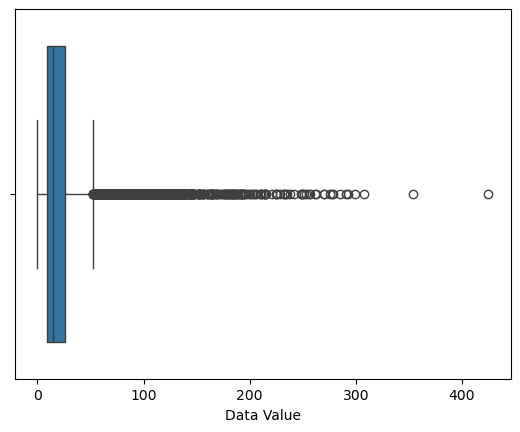

In [45]:
sns.boxplot(x = 'Data Value',data = df)

In [46]:
Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = df[(df['Data Value'] < lower_bound) | (df['Data Value'] > upper_bound)].shape[0]

print(f"Number of outliers: {outliers_count}")

Number of outliers: 990


### *Data Cleaning*

`Name`

In [47]:
# Strip leading/trailing spaces  
df['Name'] = df['Name'].str.strip()

# Replace multiple spaces with single space  
df['Name'] = df['Name'].str.replace(r'\s+', ' ', regex=True)

# Convert to Title Case (if that makes sense for your data)  
df['Name'] = df['Name'].str.title()

# Optionally, check unique values after cleaning  
print(df['Name'].unique())

['Nitrogen Dioxide (No2)' 'Fine Particles (Pm 2.5)'
 'Boiler Emissions- Total So2 Emissions' 'Ozone (O3)'
 'Asthma Emergency Department Visits Due To Pm2.5'
 'Annual Vehicle Miles Traveled'
 'Respiratory Hospitalizations Due To Pm2.5 (Age 20+)'
 'Asthma Hospitalizations Due To Ozone'
 'Boiler Emissions- Total Nox Emissions'
 'Boiler Emissions- Total Pm2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Asthma Emergency Departments Visits Due To Ozone'
 'Annual Vehicle Miles Traveled (Cars)'
 'Annual Vehicle Miles Traveled (Trucks)'
 'Cardiovascular Hospitalizations Due To Pm2.5 (Age 40+)'
 'Deaths Due To Pm2.5' 'Cardiac And Respiratory Deaths Due To Ozone']


In [48]:
df['Name'].value_counts()

Name
Nitrogen Dioxide (No2)                                    6345
Fine Particles (Pm 2.5)                                   6345
Ozone (O3)                                                2115
Asthma Emergency Departments Visits Due To Ozone           480
Asthma Emergency Department Visits Due To Pm2.5            480
Asthma Hospitalizations Due To Ozone                       480
Annual Vehicle Miles Traveled                              321
Annual Vehicle Miles Traveled (Trucks)                     321
Annual Vehicle Miles Traveled (Cars)                       321
Deaths Due To Pm2.5                                        240
Cardiovascular Hospitalizations Due To Pm2.5 (Age 40+)     240
Cardiac And Respiratory Deaths Due To Ozone                240
Respiratory Hospitalizations Due To Pm2.5 (Age 20+)        240
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Boiler Emissions- Total Nox Emissions             

In [49]:
# Add space after dash if missing
df['Name'] = df['Name'].str.replace(r'Boiler Emissions-\s*', 'Boiler Emissions - ', regex=True)

# Standardize chemical symbols:
df['Name'] = df['Name'].str.replace(r'No2', 'NO2', regex=False)
df['Name'] = df['Name'].str.replace(r'Pm 2.5', 'PM2.5', regex=False)
df['Name'] = df['Name'].str.replace(r'Pm2.5', 'PM2.5', regex=False)
df['Name'] = df['Name'].str.replace(r'O3', 'O3', regex=False)

# Double check unique values again
print(df['Name'].unique())

['Nitrogen Dioxide (NO2)' 'Fine Particles (PM2.5)'
 'Boiler Emissions - Total So2 Emissions' 'Ozone (O3)'
 'Asthma Emergency Department Visits Due To PM2.5'
 'Annual Vehicle Miles Traveled'
 'Respiratory Hospitalizations Due To PM2.5 (Age 20+)'
 'Asthma Hospitalizations Due To Ozone'
 'Boiler Emissions - Total Nox Emissions'
 'Boiler Emissions - Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Asthma Emergency Departments Visits Due To Ozone'
 'Annual Vehicle Miles Traveled (Cars)'
 'Annual Vehicle Miles Traveled (Trucks)'
 'Cardiovascular Hospitalizations Due To PM2.5 (Age 40+)'
 'Deaths Due To PM2.5' 'Cardiac And Respiratory Deaths Due To Ozone']


In [50]:
df['Name'].value_counts()

Name
Nitrogen Dioxide (NO2)                                    6345
Fine Particles (PM2.5)                                    6345
Ozone (O3)                                                2115
Asthma Emergency Departments Visits Due To Ozone           480
Asthma Emergency Department Visits Due To PM2.5            480
Asthma Hospitalizations Due To Ozone                       480
Annual Vehicle Miles Traveled                              321
Annual Vehicle Miles Traveled (Trucks)                     321
Annual Vehicle Miles Traveled (Cars)                       321
Deaths Due To PM2.5                                        240
Cardiovascular Hospitalizations Due To PM2.5 (Age 40+)     240
Cardiac And Respiratory Deaths Due To Ozone                240
Respiratory Hospitalizations Due To PM2.5 (Age 20+)        240
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Boiler Emissions - Total Nox Emissions            

`Measure`

In [51]:
# Trim spaces
df['Measure'] = df['Measure'].str.strip()

# Fix casing — choose one style (title case recommended)
df['Measure'] = df['Measure'].str.title()

# Convert to category for efficiency
df['Measure'] = df['Measure'].astype('category')

# Check unique values after cleaning
print(df['Measure'].unique())

['Mean', 'Number Per Km2', 'Estimated Annual Rate (Age 18+)', 'Million Miles', 'Estimated Annual Rate', 'Estimated Annual Rate (Under Age 18)', 'Annual Average Concentration', 'Estimated Annual Rate (Age 30+)']
Categories (8, object): ['Annual Average Concentration', 'Estimated Annual Rate', 'Estimated Annual Rate (Age 18+)', 'Estimated Annual Rate (Age 30+)', 'Estimated Annual Rate (Under Age 18)', 'Mean', 'Million Miles', 'Number Per Km2']


In [52]:
df['Measure'].value_counts()

Measure
Mean                                    14805
Million Miles                             963
Estimated Annual Rate                     720
Estimated Annual Rate (Age 18+)           720
Estimated Annual Rate (Under Age 18)      720
Annual Average Concentration              406
Number Per Km2                            288
Estimated Annual Rate (Age 30+)           240
Name: count, dtype: int64

In [53]:
def extract_age_group(measure):
    if 'Under Age 18' in measure:
        return 'Under 18'
    elif 'Age 18+' in measure:
        return '18+'
    elif 'Age 30+' in measure:
        return '30+'
    else:
        return 'All Ages'

df['Age_Group'] = df['Measure'].apply(extract_age_group)

In [54]:
df['Age_Group'].value_counts()

Age_Group
All Ages    17182
18+           720
Under 18      720
30+           240
Name: count, dtype: int64

`Measure Info`

In [55]:
# Trim spaces
df['Measure Info'] = df['Measure Info'].str.strip()

# Consistent casing — I recommend lowercase or title case (choose one)
df['Measure Info'] = df['Measure Info'].str.lower()

# Convert to category
df['Measure Info'] = df['Measure Info'].astype('category')

# Check unique values
print(df['Measure Info'].unique())

['ppb', 'mcg/m3', 'number', 'per 100,000 adults', 'per square mile', 'per 100,000 children', 'âµg/m3', 'per 100,000']
Categories (8, object): ['mcg/m3', 'number', 'per 100,000', 'per 100,000 adults', 'per 100,000 children', 'per square mile', 'ppb', 'âµg/m3']


In [56]:
df['Measure Info'].value_counts()

Measure Info
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64

In [57]:
# Standardization function 
def standardize_measure(info):
    info = str(info).strip().lower()
    
    # Handle unit variations
    if any(unit in info for unit in ['µg/m3', 'âµg/m3', 'mcg/m3', 'ug/m3']):
        return 'mcg/m3'
    
    # Handle population rate variations
    if 'per 100,000' in info:
        if 'children' in info:
            return 'per 100,000 children'
        return 'per 100,000 adults'
    
    return info

# Apply standardization
df['Measure_Standardized'] = df['Measure Info'].apply(standardize_measure)

# Get value counts
measure_counts = df['Measure_Standardized'].value_counts().reset_index()
measure_counts.columns = ['Measure_Standardized', 'Count']

# Create desired output format
output_measures = [
    'ppb',
    'mcg/m3', 
    'per 100,000 adults',
    'per 100,000 children',
    'per square mile',
    'number'
]

# Merge and format
result = pd.DataFrame({'Measure Info': output_measures})
result = result.merge(
    measure_counts, 
    left_on='Measure Info', 
    right_on='Measure_Standardized', 
    how='left'
).drop(columns='Measure_Standardized')

# Fill NA with 0 and format numbers
result['Count'] = result['Count'].fillna(0).astype(int)
result['Count'] = result['Count'].apply(lambda x: f"{x:,}")

# Print formatted output
print(result.to_markdown(index=False, stralign='left'))

| Measure Info         | Count   |
|:---------------------|:--------|
| ppb                  | 8,460   |
| mcg/m3               | 6,751   |
| per 100,000 adults   | 1,680   |
| per 100,000 children | 720     |
| per square mile      | 963     |
| number               | 288     |


`Geo Place Name`

In [58]:
# Trim spaces
df['Geo Place Name'] = df['Geo Place Name'].str.strip()

# Replace multiple spaces with a single space
df['Geo Place Name'] = df['Geo Place Name'].str.replace(r'\s+', ' ', regex=True)

# Title case for consistency
df['Geo Place Name'] = df['Geo Place Name'].str.title()

# Replace empty strings with NaN
df['Geo Place Name'] = df['Geo Place Name'].replace('', np.nan)

# Convert to category for memory optimization
df['Geo Place Name'] = df['Geo Place Name'].astype('category')

# Check unique values and sample
print(df['Geo Place Name'].unique())

['Flushing And Whitestone (Cd7)', 'Upper West Side (Cd7)', 'Rockaway And Broad Channel (Cd14)', 'Flatbush And Midwood (Cd14)', 'Sunset Park (Cd7)', ..., 'Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'New York City']
Length: 114
Categories (114, object): ['Bay Ridge And Dyker Heights (Cd10)', 'Bayside - Little Neck', 'Bayside And Little Neck (Cd11)', 'Bayside Little Neck-Fresh Meadows', ..., 'Williamsbridge And Baychester (Cd12)', 'Williamsburg - Bushwick', 'Willowbrook', 'Woodside And Sunnyside (Cd2)']


In [59]:
df['Geo Place Name'].value_counts()

Geo Place Name
Central Harlem - Morningside Heights              281
Canarsie - Flatlands                              281
Flushing - Clearview                              281
Southeast Queens                                  281
Fordham - Bronx Pk                                281
East New York                                     281
Sunset Park                                       281
East Harlem                                       281
East Flatbush - Flatbush                          281
Jamaica                                           281
Downtown - Heights - Slope                        281
Long Island City - Astoria                        281
Coney Island - Sheepshead Bay                     281
Greenpoint                                        281
Southwest Queens                                  281
Northeast Bronx                                   281
Washington Heights                                281
Rockaways                                         281
Ridgewood - F

`Time Period`

In [60]:
def extract_start_year(time_period):
    match = re.search(r'(\d{4})', str(time_period))
    if match:
        return int(match.group(1))
    return np.nan

df['Start Year'] = df['Time Period'].apply(extract_start_year).astype('Int64')

# Drop End Year and Duration columns if present
df = df.drop(columns=['End Year', 'Duration'], errors='ignore')

print(df[['Time Period', 'Start Year']].head(10))

           Time Period  Start Year
0       Winter 2014-15        2014
1       Winter 2014-15        2014
2  Annual Average 2017        2017
3       Winter 2015-16        2015
4          Summer 2016        2016
5       Winter 2015-16        2015
6          Summer 2016        2016
7  Annual Average 2018        2018
8  Annual Average 2016        2016
9       Winter 2021-22        2021


`Start_Date`

In [61]:
def parse_dates(date_str):
    for fmt in ('%d/%m/%y', '%m/%d/%y', '%Y-%m-%d', '%d-%m-%Y', '%m-%d-%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # if no format matches

df['Start_Date'] = df['Start_Date'].apply(parse_dates)

# Check for any remaining null dates
print(df['Start_Date'].isna().sum())

# Confirm the dtype
print(df['Start_Date'].dtype)

# Sample check
print(df['Start_Date'].head())

282
datetime64[ns]
0   2014-01-12
1   2014-01-12
2   2017-01-01
3   2015-01-12
4   2016-01-06
Name: Start_Date, dtype: datetime64[ns]


In [62]:
df['Start_Date'].value_counts()

Start_Date
2015-01-01    906
2005-01-01    897
2017-01-01    762
2019-01-01    603
2011-01-12    564
2010-01-12    564
2009-01-12    564
2008-01-12    564
2013-01-12    564
2012-01-12    564
2012-02-01    480
2009-01-01    480
2022-01-06    423
2020-01-06    423
2023-01-06    423
2017-01-06    423
2018-01-06    423
2019-01-06    423
2015-01-06    423
2014-01-06    423
2012-01-06    423
2011-01-06    423
2010-01-06    423
2021-01-06    423
2009-01-06    423
2016-01-06    423
2013-01-06    423
2010-01-01    321
2016-01-12    282
2020-01-01    282
2018-01-12    282
2014-01-12    282
2022-01-12    282
2023-01-01    282
2019-01-12    282
2022-01-01    282
2017-01-12    282
2020-01-12    282
2021-01-01    282
2021-01-12    282
2018-01-01    282
2015-01-12    282
2011-01-01    214
2013-01-01    144
2014-01-01     96
Name: count, dtype: int64

`Data Value`

In [63]:
Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers and update df in place
df['Data Value'] = df['Data Value'].clip(lower=lower_bound, upper=upper_bound)

# Now count outliers again on the capped data
outliers_after_capping = df[(df['Data Value'] < lower_bound) | (df['Data Value'] > upper_bound)].shape[0]
print(f"Outliers after capping: {outliers_after_capping}")

Outliers after capping: 0


### *Data Analysis*
- Categorizing the columns as Continous, Categorical, Timeseries

In [64]:
df.columns

Index(['Name', 'Measure', 'Measure Info', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Age_Group', 'Measure_Standardized',
       'Start Year'],
      dtype='object')

In [65]:
categorical = ['Name', 'Measure', 'Measure Info','Measure_Standardized', 'Geo Place Name', 'Time Period', 'Age_Group']
continuous = ['Data Value']
time_series = ['Start_Date', 'Start Year']

In [66]:
df[categorical].describe()

,Name,Measure,Measure Info,Measure_Standardized,Geo Place Name,Time Period,Age_Group
count,18862,18862,18862,18862,18862,18862,18862
unique,18,8,8,6,114,57,4
top,Nitrogen Dioxide (NO2),Mean,ppb,ppb,Central Harlem - Morningside Heights,2012-2014,All Ages
freq,6345,14805,8460,8460,281,480,17182


In [67]:
df[continuous].describe()

,Data Value
count,18862.000000
mean,18.601093
std,12.732904
min,0.000000
25%,8.742004
50%,14.790000
75%,26.267500
max,52.555744


In [68]:
df[time_series].describe()

,Start_Date,Start Year
count,18580,18862.0
mean,2014-09-25 04:29:37.911732992,2014.824197
min,2005-01-01 00:00:00,2005.0
25%,2011-01-06 00:00:00,2011.0
50%,2015-01-01 00:00:00,2015.0
75%,2019-01-01 00:00:00,2019.0
max,2023-01-06 00:00:00,2023.0
std,NaN,4.701069


#### *Univariate Analysis (Categorical Column)*

=== Name ===
Name
Nitrogen Dioxide (NO2)                                    6345
Fine Particles (PM2.5)                                    6345
Ozone (O3)                                                2115
Asthma Emergency Departments Visits Due To Ozone           480
Asthma Emergency Department Visits Due To PM2.5            480
Asthma Hospitalizations Due To Ozone                       480
Annual Vehicle Miles Traveled                              321
Annual Vehicle Miles Traveled (Trucks)                     321
Annual Vehicle Miles Traveled (Cars)                       321
Deaths Due To PM2.5                                        240
Cardiovascular Hospitalizations Due To PM2.5 (Age 40+)     240
Cardiac And Respiratory Deaths Due To Ozone                240
Respiratory Hospitalizations Due To PM2.5 (Age 20+)        240
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Boiler Emissions - Total Nox Emission

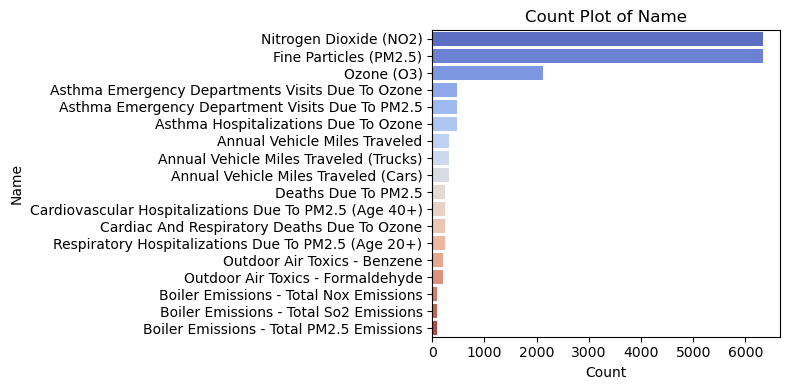

In [69]:
print("=== Name ===")
print(df['Name'].value_counts(dropna=False))

plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Name', order=df['Name'].value_counts().index, palette='coolwarm')
plt.title('Count Plot of Name')
plt.xlabel('Count')
plt.ylabel('Name')
plt.tight_layout()
plt.show()

=== Measure ===
Measure
Mean                                    14805
Million Miles                             963
Estimated Annual Rate                     720
Estimated Annual Rate (Age 18+)           720
Estimated Annual Rate (Under Age 18)      720
Annual Average Concentration              406
Number Per Km2                            288
Estimated Annual Rate (Age 30+)           240
Name: count, dtype: int64


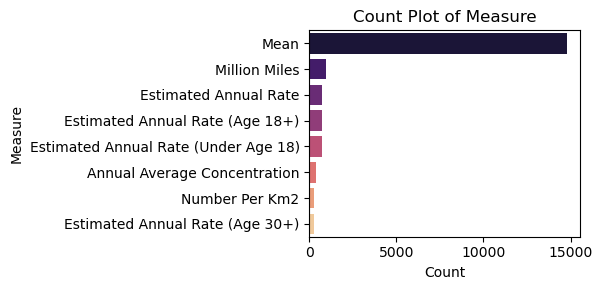

In [70]:
print("=== Measure ===")
print(df['Measure'].value_counts(dropna=False))

plt.figure(figsize=(6,3))
sns.countplot(data=df, y='Measure', order=df['Measure'].value_counts().index, palette='magma')
plt.title('Count Plot of Measure')
plt.xlabel('Count')
plt.ylabel('Measure')
plt.tight_layout()
plt.show()

=== Measure_Standardized ===
Measure_Standardized
ppb                     8460
mcg/m3                  6751
per 100,000 adults      1680
per square mile          963
per 100,000 children     720
number                   288
Name: count, dtype: int64


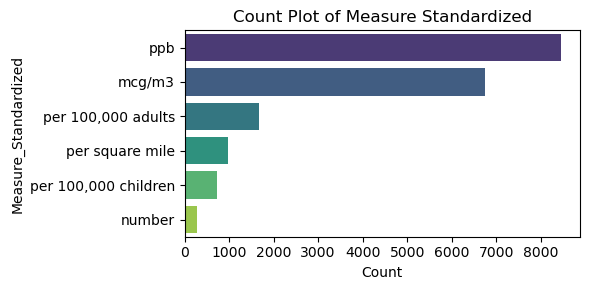

In [71]:
print("=== Measure_Standardized ===")
print(df['Measure_Standardized'].value_counts(dropna=False))

plt.figure(figsize=(6,3))
sns.countplot(data=df, y='Measure_Standardized', order=df['Measure_Standardized'].value_counts().index, palette='viridis')
plt.title('Count Plot of Measure Standardized')
plt.xlabel('Count')
plt.ylabel('Measure_Standardized')
plt.tight_layout()
plt.show()

=== Geo Place Name ===
Geo Place Name
Central Harlem - Morningside Heights              281
Canarsie - Flatlands                              281
Flushing - Clearview                              281
Southeast Queens                                  281
Fordham - Bronx Pk                                281
East New York                                     281
Sunset Park                                       281
East Harlem                                       281
East Flatbush - Flatbush                          281
Jamaica                                           281
Downtown - Heights - Slope                        281
Long Island City - Astoria                        281
Coney Island - Sheepshead Bay                     281
Greenpoint                                        281
Southwest Queens                                  281
Northeast Bronx                                   281
Washington Heights                                281
Rockaways                                   

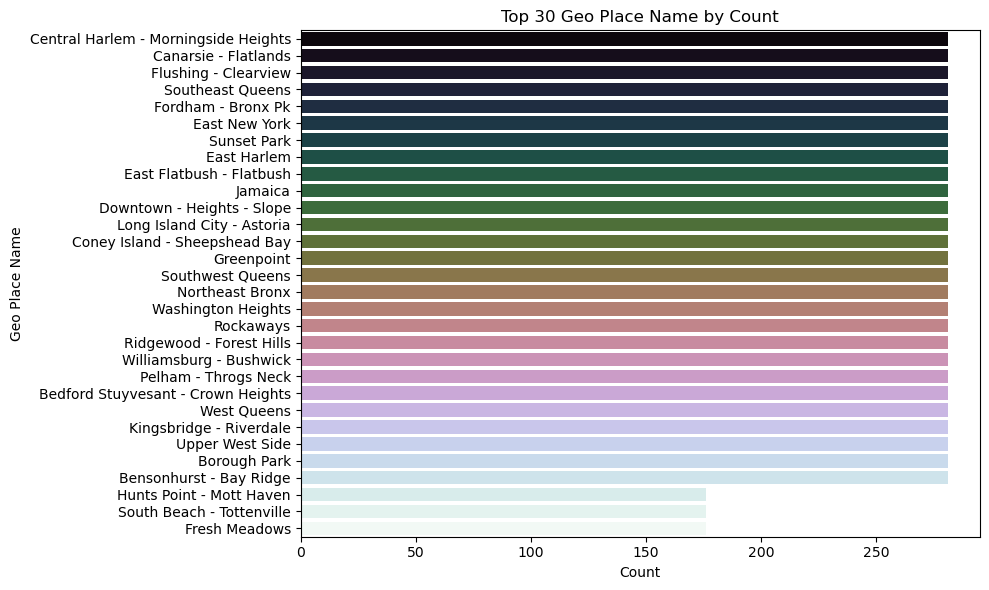

In [72]:
print("=== Geo Place Name ===")
print(df['Geo Place Name'].value_counts(dropna=False))

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Geo Place Name', order=df['Geo Place Name'].value_counts().index[:30], palette='cubehelix')
plt.title('Top 30 Geo Place Name by Count')
plt.xlabel('Count')
plt.ylabel('Geo Place Name')
plt.tight_layout()
plt.show()

=== Time Period ===
Time Period
2012-2014              480
2017-2019              480
2005-2007              480
2009-2011              480
2015-2017              480
Summer 2011            423
Summer 2015            423
Summer 2019            423
Summer 2017            423
Summer 2014            423
Summer 2022            423
Summer 2020            423
Summer 2012            423
Summer 2013            423
Summer 2010            423
Summer 2018            423
Summer 2021            423
Summer 2009            423
Summer 2016            423
Summer 2023            423
2005                   417
2019                   321
2010                   321
Winter 2018-19         282
Winter 2011-12         282
Winter 2014-15         282
Winter 2016-17         282
Winter 2009-10         282
Annual Average 2009    282
Annual Average 2011    282
Annual Average 2020    282
Annual Average 2015    282
Annual Average 2010    282
Annual Average 2019    282
Annual Average 2018    282
Winter 2021-22         

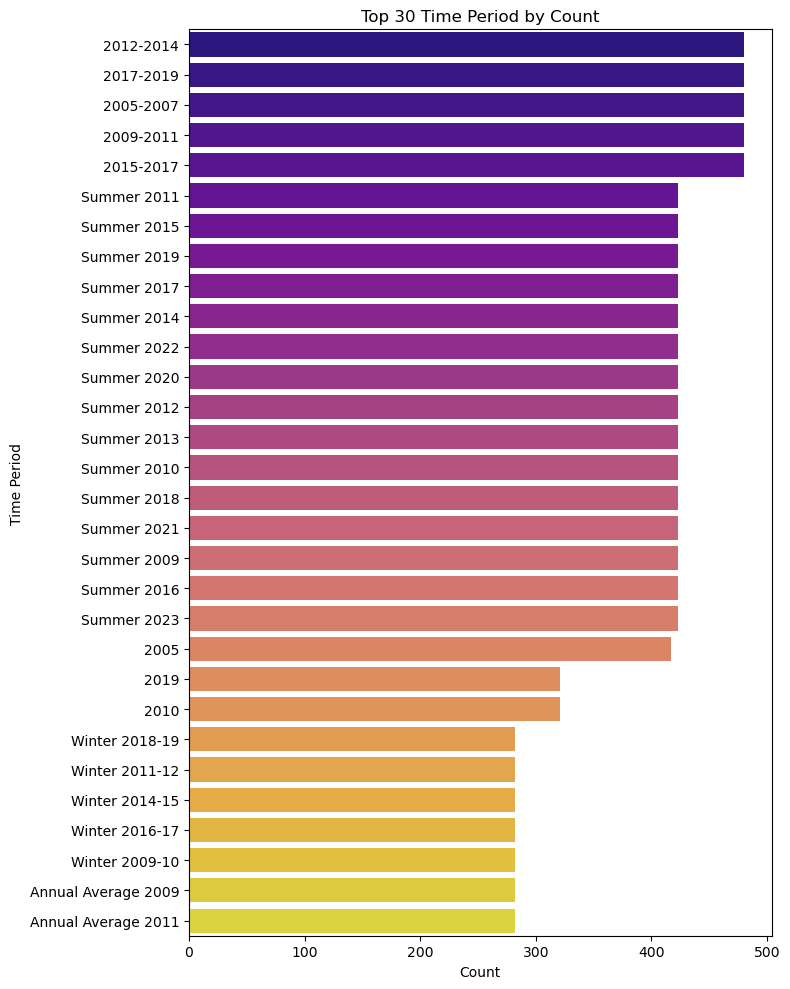

In [73]:
print("=== Time Period ===")
print(df['Time Period'].value_counts(dropna=False))

plt.figure(figsize=(8,10))
sns.countplot(data=df, y='Time Period', order=df['Time Period'].value_counts().index[:30], palette='plasma')
plt.title('Top 30 Time Period by Count')
plt.xlabel('Count')
plt.ylabel('Time Period')
plt.tight_layout()
plt.show()

=== Age_Group ===
Age_Group
All Ages    17182
18+           720
Under 18      720
30+           240
Name: count, dtype: int64


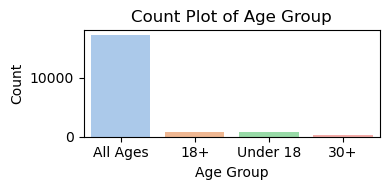

In [74]:
print("=== Age_Group ===")
print(df['Age_Group'].value_counts(dropna=False))

plt.figure(figsize=(4,2))
sns.countplot(data=df, x='Age_Group', order=df['Age_Group'].value_counts().index, palette='pastel')
plt.title('Count Plot of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

=== Data Value Summary ===
count    18862.000000
mean        18.601093
std         12.732904
min          0.000000
25%          8.742004
50%         14.790000
75%         26.267500
max         52.555744
Name: Data Value, dtype: float64


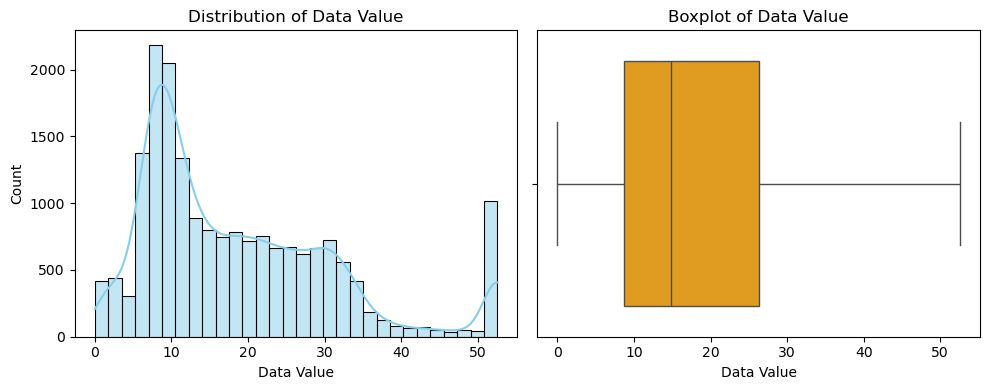

In [75]:
print("=== Data Value Summary ===")
print(df['Data Value'].describe())

plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Data Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Data Value'], color='orange')
plt.title('Boxplot of Data Value')

plt.tight_layout()
plt.show()

#### *Bivariate Analysis*

- Categorical vs Continous

=== Name vs Data Value ===


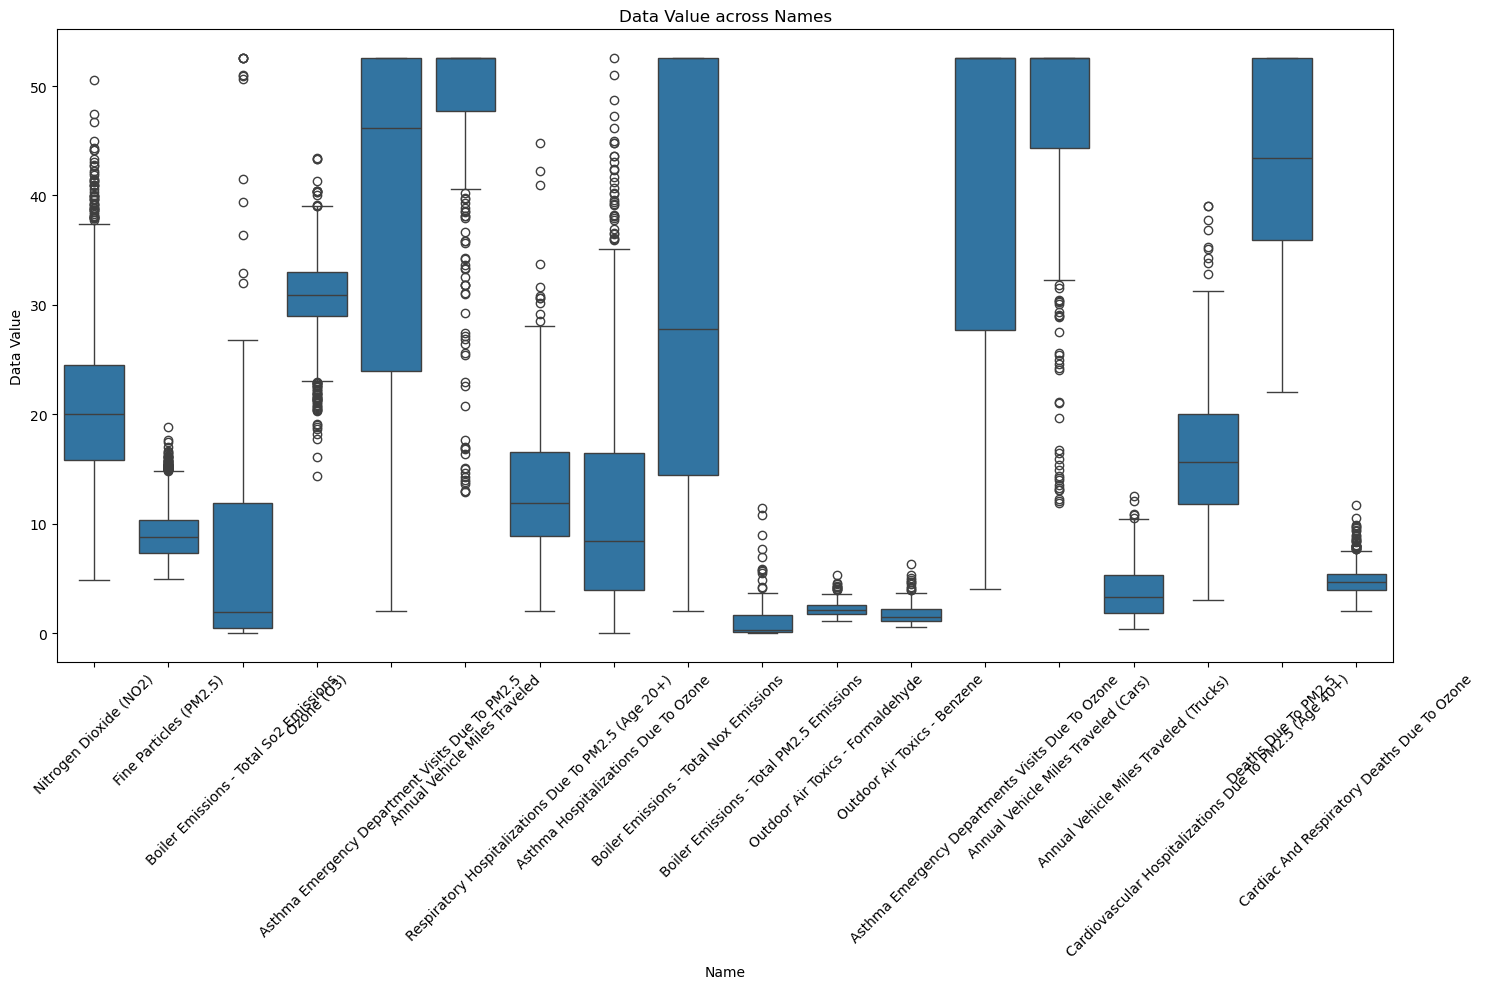

In [76]:
print("=== Name vs Data Value ===")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Name', y='Data Value')
plt.xticks(rotation=45)
plt.title('Data Value across Names')
plt.tight_layout()
plt.show()

=== Measure vs Data Value ===


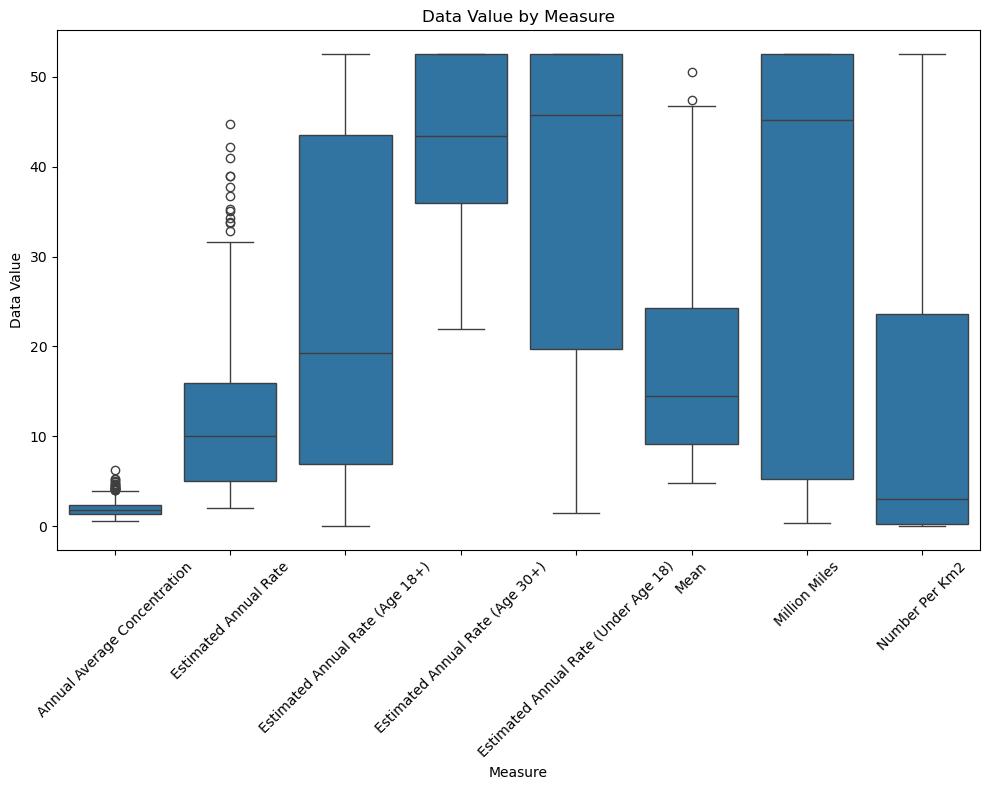

In [77]:
print("=== Measure vs Data Value ===")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Measure', y='Data Value')
plt.title('Data Value by Measure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Measure Info vs Data Value ===


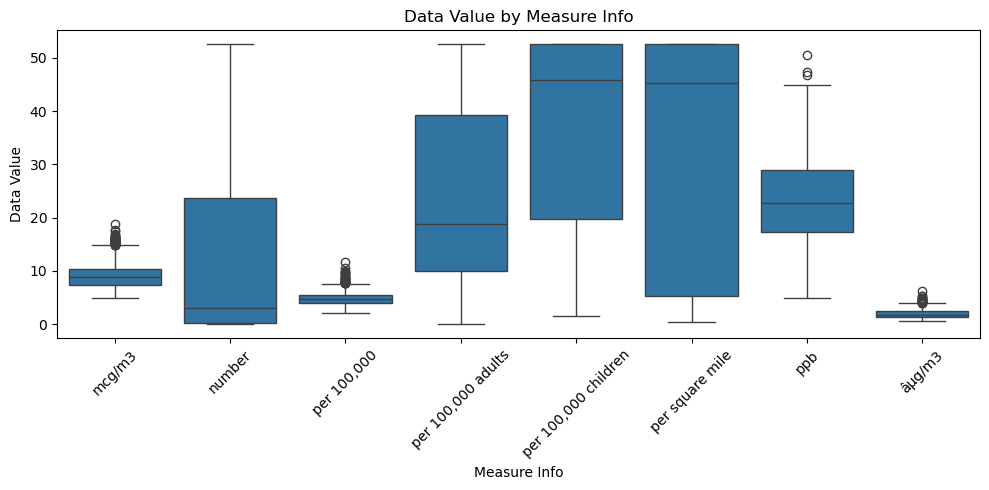

In [78]:
print("=== Measure Info vs Data Value ===")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Measure Info', y='Data Value')
plt.title('Data Value by Measure Info')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Measure Standaridized vs Data Value ===


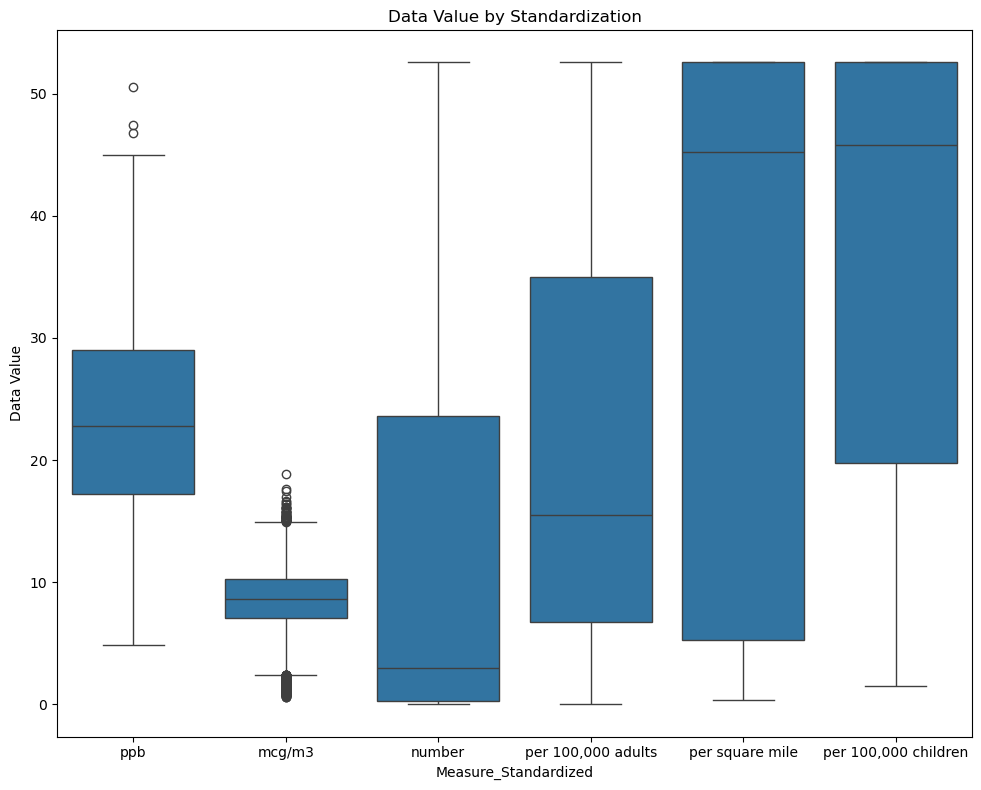

In [79]:
print("=== Measure Standaridized vs Data Value ===")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Measure_Standardized', y='Data Value')
plt.title('Data Value by Standardization')
plt.tight_layout()
plt.show()

=== Geo Place Name vs Data Value ===


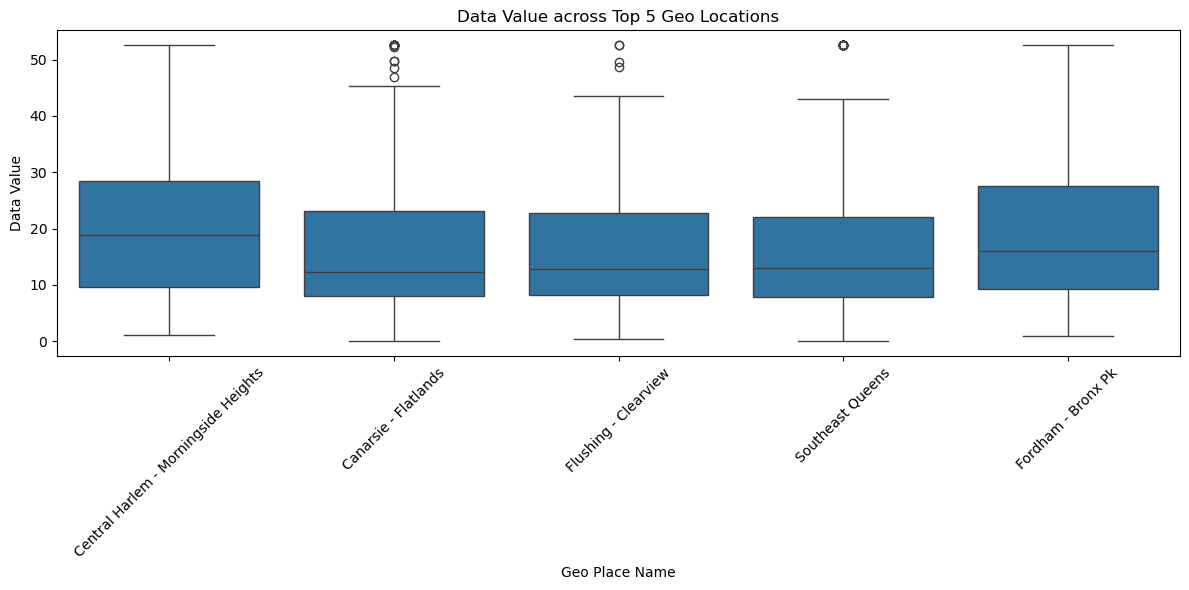

In [80]:
print("=== Geo Place Name vs Data Value ===")
# Get top 5 Geo Place Names
top_places = df['Geo Place Name'].value_counts().head(5).index.tolist()

# Filter dataset
filtered_df = df[df['Geo Place Name'].isin(top_places)].copy()

# Force categorical order for the plot
filtered_df['Geo Place Name'] = pd.Categorical(
    filtered_df['Geo Place Name'],
    categories=top_places,
    ordered=True
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Geo Place Name', y='Data Value')
plt.title('Data Value across Top 5 Geo Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Time Period vs Data Value ===


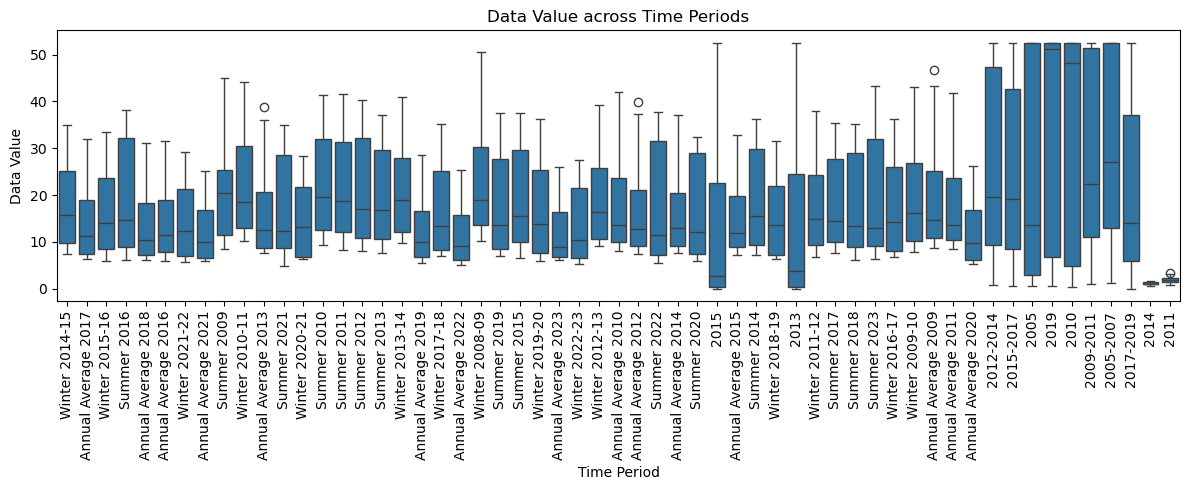

In [81]:
print("=== Time Period vs Data Value ===")
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Time Period', y='Data Value')
plt.title('Data Value across Time Periods')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

=== Age Group vs Data Value ===


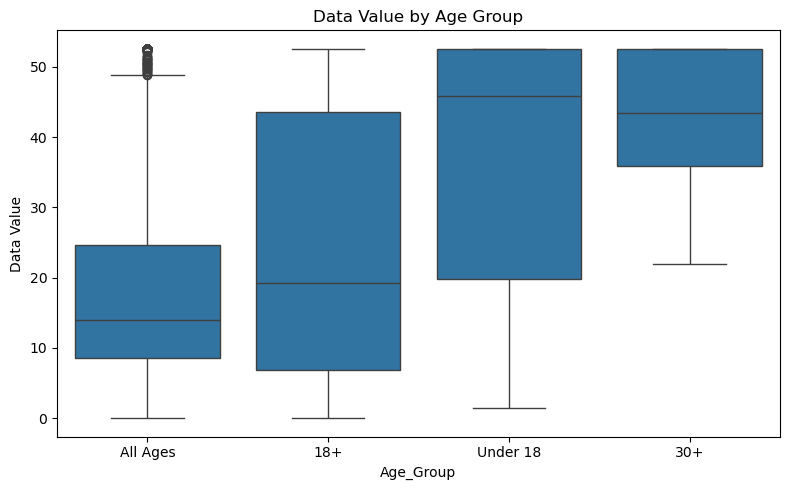

In [82]:
print("=== Age Group vs Data Value ===")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age_Group', y='Data Value')
plt.title('Data Value by Age Group')
plt.tight_layout()
plt.show()

- Categorical vs Categorical

=== Measure vs Measure Standardized ===


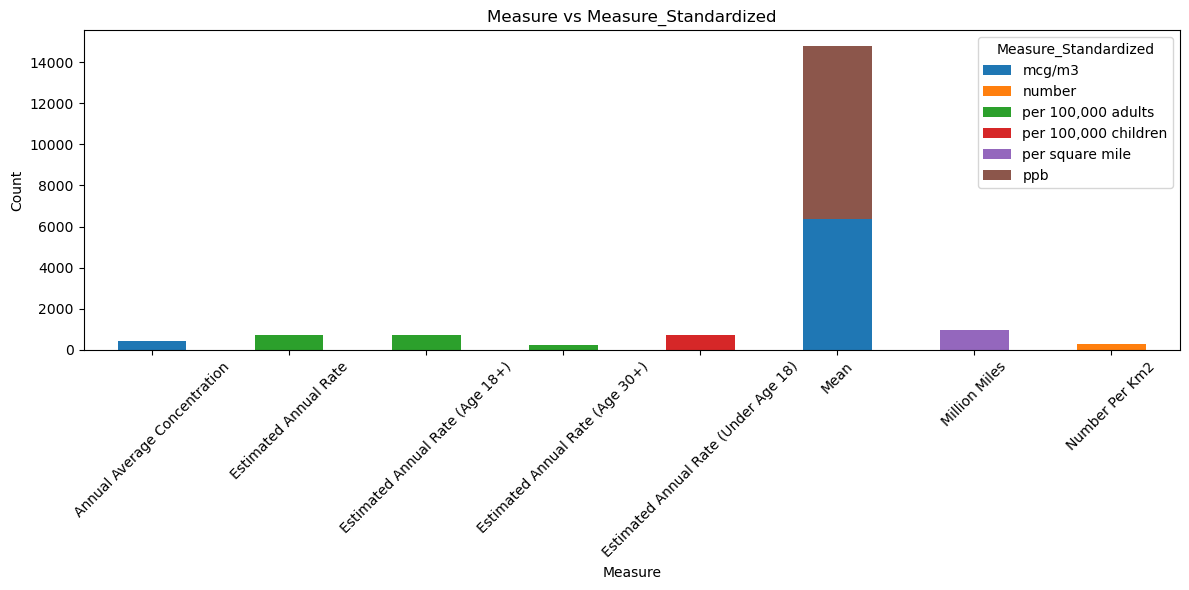

In [84]:
print("=== Measure vs Measure Standardized ===")
pd.crosstab(df['Measure'], df['Measure_Standardized']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Measure vs Measure_Standardized')
plt.xlabel('Measure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Age Group vs Measure ===


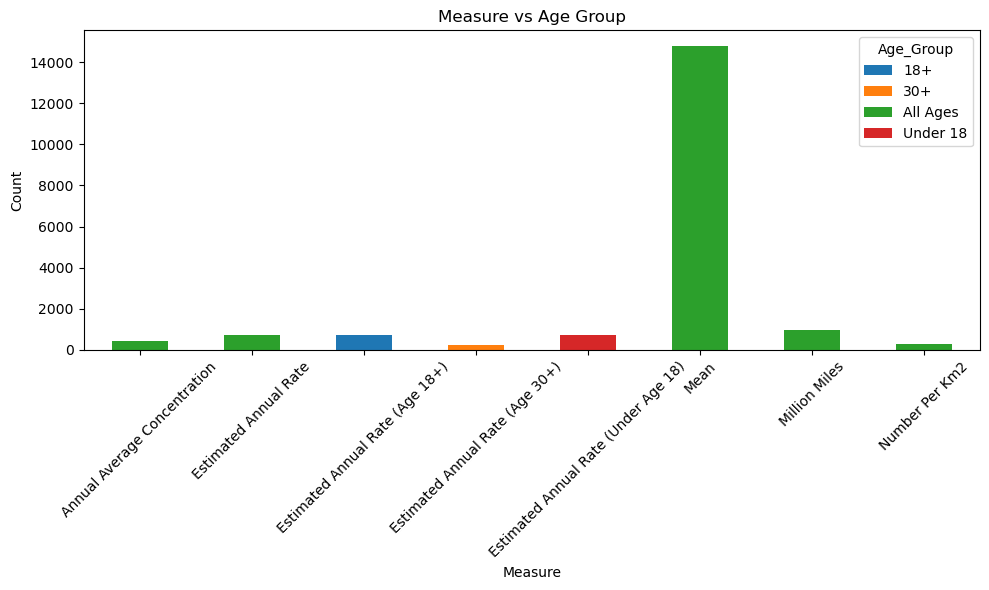

In [86]:
print("=== Age Group vs Measure ===")
pd.crosstab(df['Measure'], df['Age_Group']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Measure vs Age Group')
plt.xlabel('Measure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Age Group vs Time Period ===


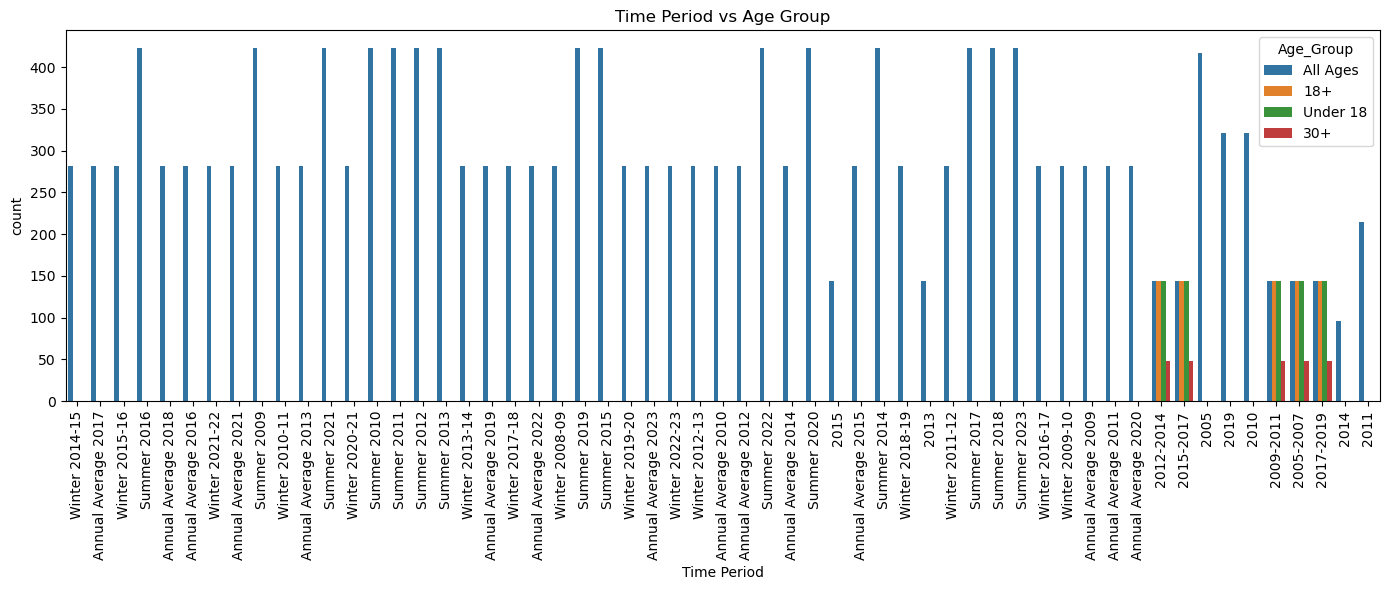

In [88]:
print("=== Age Group vs Time Period ===")
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Time Period', hue='Age_Group')
plt.title('Time Period vs Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

=== Age Group vs Measure ===


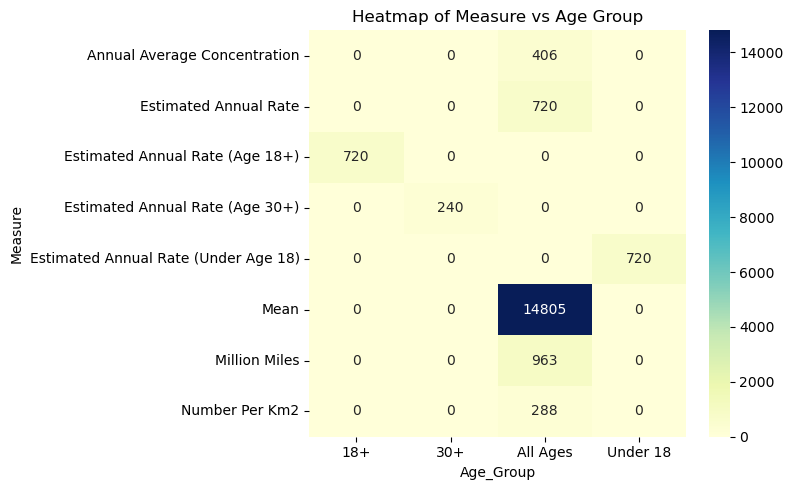

In [95]:
print("=== Age Group vs Measure ===")
cross = pd.crosstab(df['Measure'], df['Age_Group'])

plt.figure(figsize=(8, 5))
sns.heatmap(cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Measure vs Age Group')
plt.tight_layout()
plt.show()

- Multivariate Analysis

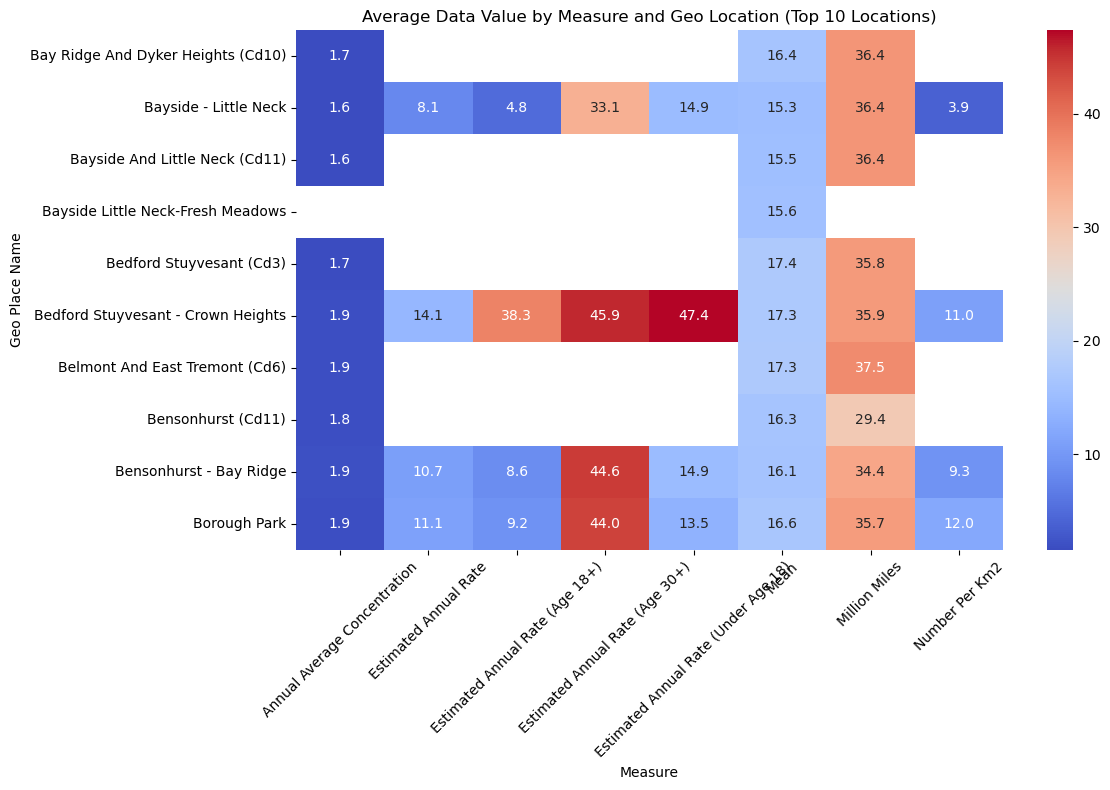

In [97]:
pivot = df.pivot_table(
    values='Data Value',
    index='Geo Place Name',
    columns='Measure',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot.head(10), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Data Value by Measure and Geo Location (Top 10 Locations)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

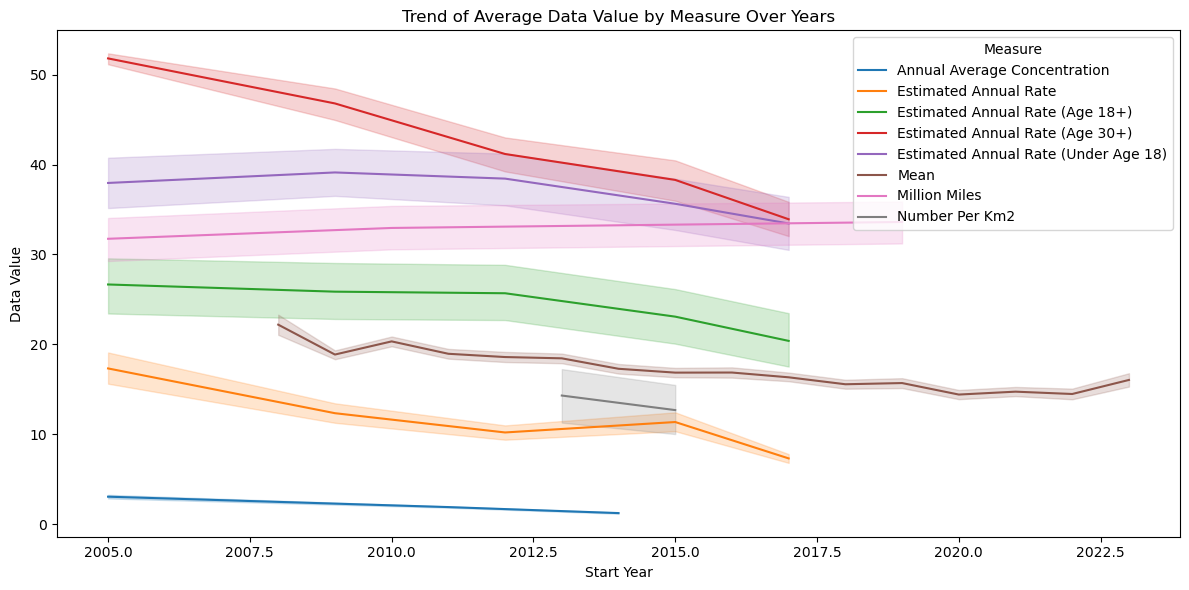

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Start Year', y='Data Value', hue='Measure', estimator='mean')
plt.title('Trend of Average Data Value by Measure Over Years')
plt.tight_layout()
plt.show()

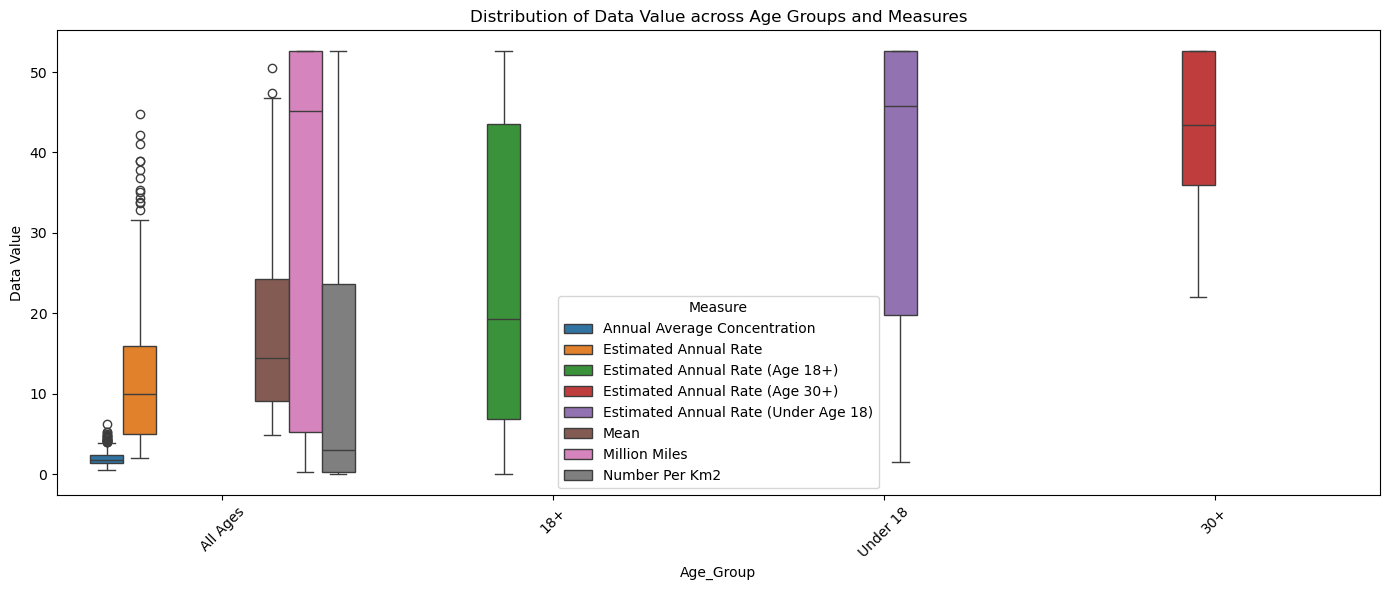

In [99]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Age_Group', y='Data Value', hue='Measure')
plt.title('Distribution of Data Value across Age Groups and Measures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *Data Analysis (Business Problem based)*

#### *1. Pollution Levels & Sources*
**Question:** What are the average, minimum, and maximum concentrations of pollutants across different districts? How do vehicle emissions and boiler usage contribute?

In [100]:
# Pollution levels by district (Geo Place Name) and pollutant (Name)
pollution_stats = df.groupby(['Geo Place Name', 'Name'])['Data Value'].agg(['mean', 'min', 'max']).reset_index()

# Emission sources - vehicle miles and boiler emissions
vehicle_boiler = df[df['Name'].isin(['Annual Vehicle Miles Traveled', 'Annual Vehicle Miles Traveled (Trucks)', 'Annual Vehicle Miles Traveled (Cars)', 
                                    'Boiler Emissions - Total Nox Emissions', 'Boiler Emissions - Total So2 Emissions', 'Boiler Emissions - Total PM2.5 Emissions'])]

emissions_summary = vehicle_boiler.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

print(pollution_stats.head(10))
print(emissions_summary.head(10))

                       Geo Place Name  \
0  Bay Ridge And Dyker Heights (Cd10)   
1  Bay Ridge And Dyker Heights (Cd10)   
2  Bay Ridge And Dyker Heights (Cd10)   
3  Bay Ridge And Dyker Heights (Cd10)   
4  Bay Ridge And Dyker Heights (Cd10)   
5  Bay Ridge And Dyker Heights (Cd10)   
6  Bay Ridge And Dyker Heights (Cd10)   
7  Bay Ridge And Dyker Heights (Cd10)   
8  Bay Ridge And Dyker Heights (Cd10)   
9  Bay Ridge And Dyker Heights (Cd10)   

                                               Name       mean        min  \
0                     Annual Vehicle Miles Traveled  52.555744  52.555744   
1              Annual Vehicle Miles Traveled (Cars)  52.555744  52.555744   
2            Annual Vehicle Miles Traveled (Trucks)   3.983465   3.393163   
3   Asthma Emergency Department Visits Due To PM2.5        NaN        NaN   
4  Asthma Emergency Departments Visits Due To Ozone        NaN        NaN   
5              Asthma Hospitalizations Due To Ozone        NaN        NaN   
6        

#### *2. Temporal Trends*
**Question:** How do air quality and health outcomes vary by season and over the years? Are there improvements or worsening trends?

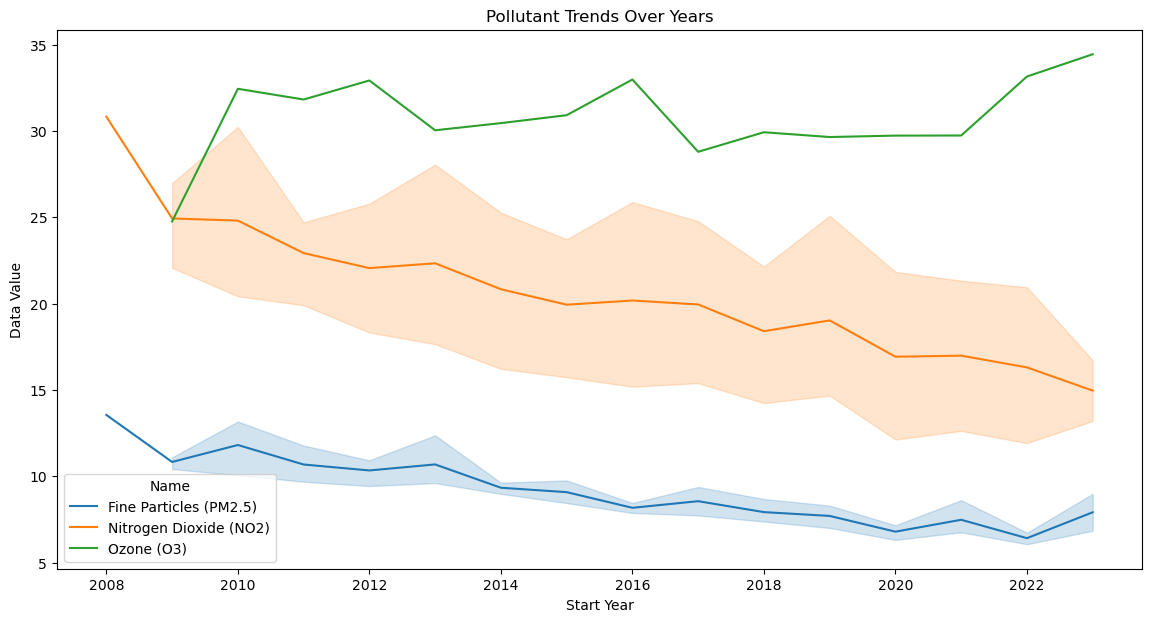

In [101]:
# Average Data Value by Time Period and Year for key pollutants & health measures
temporal_trends = df.groupby(['Start Year', 'Time Period', 'Name'])['Data Value'].mean().reset_index()

# Plot line plot for selected pollutants over years
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
selected_measures = ['Nitrogen Dioxide (NO2)', 'Fine Particles (PM2.5)', 'Ozone (O3)']
sns.lineplot(data=temporal_trends[temporal_trends['Name'].isin(selected_measures)], 
             x='Start Year', y='Data Value', hue='Name')
plt.title('Pollutant Trends Over Years')
plt.show()

#### *3. Geographic Insights*
**Question:** Which areas are most affected by pollution and health risks? How does population density relate to air quality?

In [103]:
# Average pollutant and health impact by Geo Place Name
geo_impact = df.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

# Top 10 areas with highest average NO2 pollution
top_no2_areas = geo_impact[(geo_impact['Name']=='Nitrogen Dioxide (NO2)')].sort_values('Data Value', ascending=False).head(10)

print(top_no2_areas)

                            Geo Place Name                    Name  Data Value
1147                         Midtown (Cd5)  Nitrogen Dioxide (NO2)   33.954114
769            Gramercy Park - Murray Hill  Nitrogen Dioxide (NO2)   31.658060
337                      Chelsea - Clinton  Nitrogen Dioxide (NO2)   29.978237
1723  Stuyvesant Town And Turtle Bay (Cd6)  Nitrogen Dioxide (NO2)   29.479491
355                        Chelsea-Village  Nitrogen Dioxide (NO2)   28.928614
1885              Upper East Side-Gramercy  Nitrogen Dioxide (NO2)   28.536984
373              Clinton And Chelsea (Cd4)  Nitrogen Dioxide (NO2)   27.874427
607               Financial District (Cd1)  Nitrogen Dioxide (NO2)   27.615449
1111                       Lower Manhattan  Nitrogen Dioxide (NO2)   27.528720
823               Greenwich Village - Soho  Nitrogen Dioxide (NO2)   26.843446


#### *4. Health Impact Assessment*
**Question:** What is the relationship between pollution levels and hospitalization/emergency rates?

In [104]:
# Select pollution and health impact measures
pollution_measures = ['Nitrogen Dioxide (NO2)', 'Fine Particles (PM2.5)', 'Ozone (O3)']
health_measures = ['Asthma Emergency Department Visits Due To PM2.5', 'Asthma Emergency Departments Visits Due To Ozone',
                   'Cardiovascular Hospitalizations Due To PM2.5 (Age 40+)', 'Respiratory Hospitalizations Due To PM2.5 (Age 20+)', 'Deaths Due To PM2.5']

# Create pivot tables per Geo Place Name and Start Year for pollution and health
pollution_pivot = df[df['Name'].isin(pollution_measures)].pivot_table(index=['Geo Place Name', 'Start Year'], columns='Name', values='Data Value', aggfunc='mean').reset_index()
health_pivot = df[df['Name'].isin(health_measures)].pivot_table(index=['Geo Place Name', 'Start Year'], columns='Name', values='Data Value', aggfunc='mean').reset_index()

# Merge pollution and health data on Geo Place Name and Year
merged_df = pollution_pivot.merge(health_pivot, on=['Geo Place Name', 'Start Year'])

# Calculate correlation matrix
corr_matrix = merged_df[pollution_measures + health_measures].corr()

print(corr_matrix)

Name                                                Nitrogen Dioxide (NO2)  \
Name                                                                         
Nitrogen Dioxide (NO2)                                            1.000000   
Fine Particles (PM2.5)                                            0.890889   
Ozone (O3)                                                       -0.712997   
Asthma Emergency Department Visits Due To PM2.5                   0.154297   
Asthma Emergency Departments Visits Due To Ozone                 -0.007197   
Cardiovascular Hospitalizations Due To PM2.5 (A...                0.020210   
Respiratory Hospitalizations Due To PM2.5 (Age ...               -0.019412   
Deaths Due To PM2.5                                               0.039223   

Name                                                Fine Particles (PM2.5)  \
Name                                                                         
Nitrogen Dioxide (NO2)                                         

#### *5. Demographic Patterns*
**Question:** How do different age groups experience health impacts in relation to air quality?

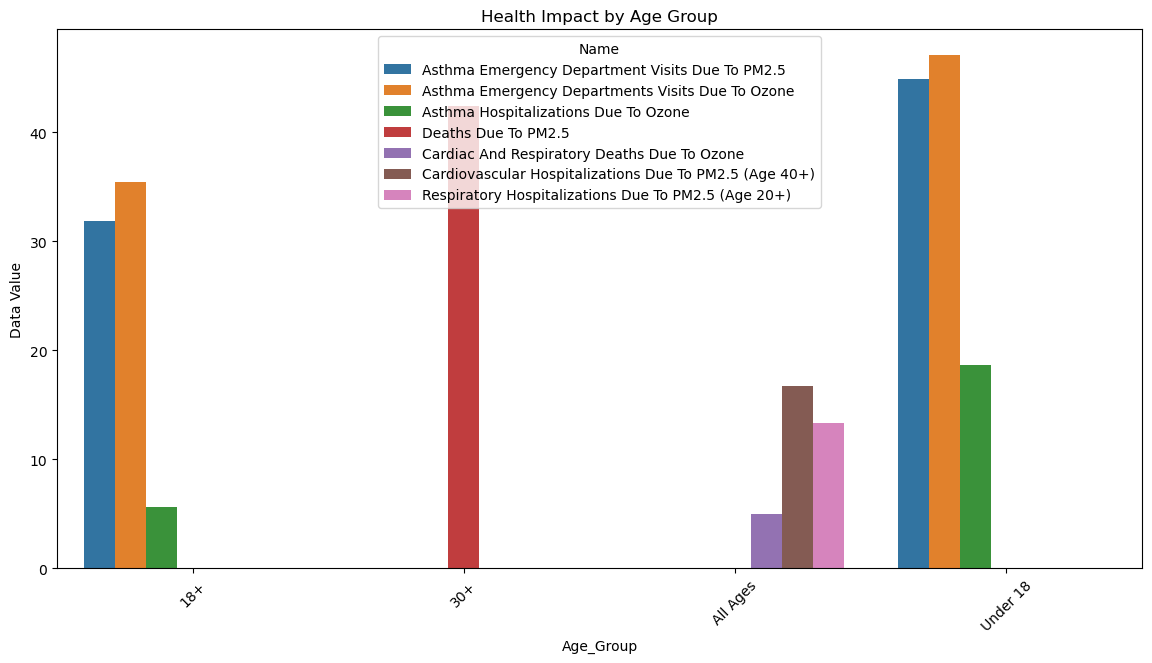

In [105]:
# Average Data Value by Age Group and Measure for health-related data
health_data = df[df['Name'].str.contains('Asthma|Cardiovascular|Respiratory|Deaths', case=False)]

age_group_impact = health_data.groupby(['Age_Group', 'Name'])['Data Value'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(data=age_group_impact, x='Age_Group', y='Data Value', hue='Name')
plt.title('Health Impact by Age Group')
plt.xticks(rotation=45)
plt.show()

#### *6. Outlier Detection & Data Quality*
**Question:** Are there extreme values? How were they handled?

count    18862.000000
mean        18.601093
std         12.732904
min          0.000000
25%          8.742004
50%         14.790000
75%         26.267500
max         52.555744
Name: Data Value, dtype: float64


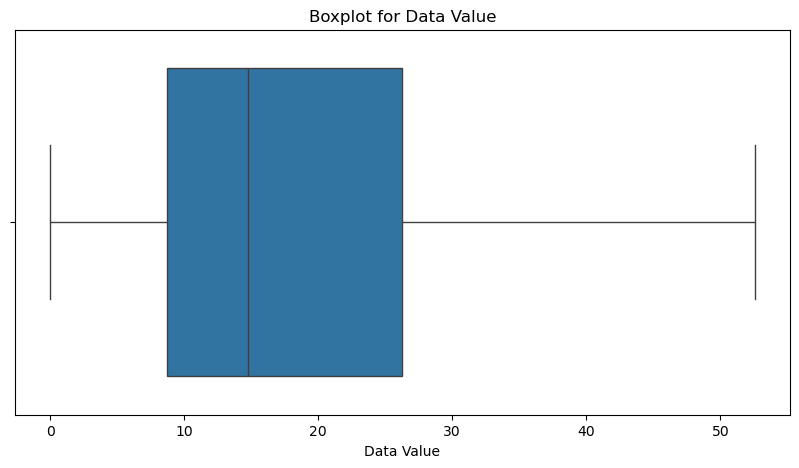

In [106]:
# Summary stats to identify outliers
print(df['Data Value'].describe())

# Plot boxplot for Data Value to visually inspect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Data Value'])
plt.title('Boxplot for Data Value')
plt.show()

# Capping example: cap Data Value at 99th percentile
cap_value = df['Data Value'].quantile(0.99)
df['Data Value Capped'] = df['Data Value'].clip(upper=cap_value)

#### *6. Measure Standardization*
**Question:** How were units standardized?

In [107]:
# Check unique Measure Info values before and after standardization
print("Before standardization:\n", df['Measure Info'].value_counts())

# Assuming you used the earlier function standardize_measure()
# Reapply or verify
df['Measure_Standardized'] = df['Measure Info'].apply(standardize_measure)

print("\nAfter standardization:\n", df['Measure_Standardized'].value_counts())

Before standardization:
 Measure Info
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64

After standardization:
 Measure_Standardized
ppb                     8460
mcg/m3                  6751
per 100,000 adults      1680
per square mile          963
per 100,000 children     720
number                   288
Name: count, dtype: int64
